In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
import os

In [2]:
abs_path = '/scratch/aew492/research-summer2020_output/'
mock_path = os.path.join(abs_path, 'gradient/1D/mock_data')

In [3]:
def load_dict(path, file):
    info = np.load(os.path.join(path, file), allow_pickle=True).item()
    return info

def mock_file(L, n, nx, rlz, m, b):
    if nx == 2:
        As_str = '_As2x'
    elif nx == 1:
        As_str = ''
    
    cat_tag = f'L{L}_n{n}_z057_patchy{As_str}'
        
    file = '{}/L{}_n{}_z057_patchy{}_rlz{}_m-{:.3f}-L_b-{:.3f}.npy'.format(cat_tag, L, n, As_str, rlz, m, b)
    return file

In [4]:
file = mock_file(750, '1e-4', 2, 0, 1.0, 0.5)
info = load_dict(mock_path, file)
print(info.keys())

dict_keys(['mock_file_name', 'cat_tag', 'lognorm_rlz', 'w_hat', 'm', 'b', 'N', 'boxsize', 'grad_expected', 'lognorm_set', 'velocities', 'rand_set', 'clust_set', 'unclust_set', 'grad_set'])


In [5]:
# suave plot function
def plot_suave(suave_fn, L, suave_dir='/scratch/aew492/research-summer2020_output/gradient/1D/suave_data'):
    suave_info = load_dict(suave_dir, suave_fn)
    amps = suave_info["amps"]
    r_fine = suave_info["r_fine"]
    xi_locs = suave_info["xi_locs"]
    
    v_min = -L/2.
    v_max = L/2.
    vs_norm = matplotlib.colors.Normalize(vmin=v_min, vmax=v_max)
    nvs = 50
    vs = np.linspace(v_min, v_max, nvs)

    cmap = plt.cm.get_cmap("cool")
    
    fig, ax = plt.subplots(figsize=(6,6))

    ax.axhline(0, color='grey', lw=0.5)

    for i, v in enumerate(vs):
        plt.plot(r_fine, xi_locs[i], color=cmap(vs_norm(v)), lw=0.5)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=vs_norm)
    cbar = plt.colorbar(sm, orientation="horizontal", location="top")
    cbar.set_label(r'$x$-displacement from the box center ($h^{-1}\,$Mpc)', labelpad=12)
    #cbar.set_label(r'$v \,\, (\mathbf{x} = v\hat{e}_\mathrm{gradient} + \mathbf{x}_\mathrm{pivot})$', rotation=0, labelpad=12)
    ax.set_ylim((-0.01, 0.12))
    ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
    ax.set_ylabel(r'correlation function $\xi(r)$')
    ax.set_title(suave_fn)

In [6]:
data = load_dict(mock_path, f'L1000_n4e-4_z057_patchy_As2x/L1000_n4e-4_z057_patchy_As2x_rlz0_m-0.635-L_b-0.500.npy')
print(data.keys())

dict_keys(['mock_file_name', 'cat_tag', 'lognorm_rlz', 'w_hat', 'm', 'b', 'N', 'boxsize', 'grad_expected', 'lognorm_set', 'velocities', 'rand_set', 'clust_set', 'unclust_set', 'grad_set'])


In [7]:
cat_tag = 'L750_n1e-4_z057_patchy_As2x'

In [8]:
rand_sets = [load_dict(mock_path, f'{cat_tag}/{cat_tag}_rlz{i}_m-1.000-L_b-0.500.npy')['rand_set'] for i in range(10)]

In [9]:
rand1 = rand_sets[0].T
rand2 = rand_sets[1].T
rand1.shape, rand2.shape

((43212, 3), (43167, 3))

In [10]:
rand1, rand2

(array([[-315.54416596,  174.45408437,  -51.77763361],
        [ 114.09686852,  -42.71666897,  218.9316578 ],
        [ 177.02416263,   56.02667312, -216.16823989],
        ...,
        [-153.12841742,  131.36247727,  114.82697563],
        [-154.69595878,   33.54394883,  223.68691451],
        [ 209.57306789,  182.47685527,  316.29502309]]),
 array([[ 333.23446312, -105.14770844,   59.33992723],
        [ 348.42023647, -161.43746906, -346.91341504],
        [-126.02664876, -132.26710247,   48.30079706],
        ...,
        [ 360.72987746,  130.64711204,  122.89848513],
        [ 371.64745518, -238.10188598, -327.26435999],
        [ 180.11128507,  332.02880561, -363.56611713]]))

In [11]:
# super thin slice
rand1_sl = rand1[np.where(rand1[:,2]<-350)]
rand2_sl = rand2[np.where(rand2[:,2]<-350)]
rand1_sl.shape, rand2_sl.shape

((1457, 3), (1444, 3))

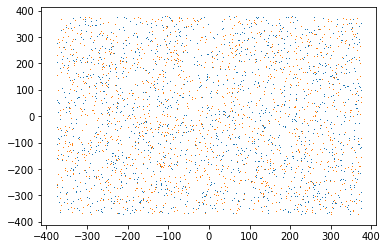

In [12]:
plt.plot(rand1_sl[:,0], rand1_sl[:,1], ls='None', marker=',')
plt.plot(rand2_sl[:,0], rand2_sl[:,1], ls='None', marker=',')